In [1]:
import pandas as pd
import pandas as pd

test = pd.read_csv("001_test.csv")
dev = pd.read_csv("001_dev.csv")

df = pd.read_json("004_results_new.jsonl", lines=True)
labels = [
'happiness', 
'neutral', 
'sadness',
'fear', 
'anger', 
]
from sklearn.metrics import accuracy_score, f1_score
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"],
                                                     row["y_pred"],
                                                     ), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"],
                                              row["y_pred"], average="macro", labels=labels), axis=1)

# df = df[df.split.str.contains("test")]
df = df.iloc[[i for i in range(df.shape[0]) if i%3 != 0], :].reset_index(drop=True)
df.model_name_or_path.value_counts()

facebook/wav2vec2-large-960h-lv60-self          8
classla/wav2vec2-large-slavic-parlaspeech-hr    8
facebook/wav2vec2-large-slavic-voxpopuli-v2     8
Name: model_name_or_path, dtype: int64

In [2]:
ids = []
sp_ids = []
for i, row in df.iterrows():
    if "test" in row["split"] :
        ids.append(
            test.utterance_id.tolist()
        )
        sp_ids.append(
            test.speaker_id.tolist()
        )
    else:
        ids.append(
            dev.utterance_id.tolist()
        )
        sp_ids.append(
            dev.speaker_id.tolist()
        )
df["utterance_ids"] = ids
df["speaker_ids"] = sp_ids
for i, row in df.iterrows():
    assert len(row["utterance_ids"]) == len(row["y_pred"])

In [3]:
df.to_json("005_analysis_of_outputs.jsonl", orient="records", lines=True)

In [4]:
df.groupby(["model_name_or_path", "split"]).agg(
    {"accuracy": [pd.np.mean, pd.np.std],
     "macroF1": [pd.np.mean, pd.np.std]}
)

/tmp/ipykernel_30823/1664741911.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  {"accuracy": [pd.np.mean, pd.np.std],
/tmp/ipykernel_30823/1664741911.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  "macroF1": [pd.np.mean, pd.np.std]}


accuracy            \
                                                        mean       std   
model_name_or_path                           split                       
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.735149  0.021954   
                                             test   0.683168  0.014002   
facebook/wav2vec2-large-960h-lv60-self       dev    0.676980  0.019120   
                                             test   0.648515  0.055126   
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.699257  0.039887   
                                             test   0.655941  0.016909   

                                                     macroF1            
                                                        mean       std  
model_name_or_path                           split                      
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.721596  0.018254  
                                             test   0.665986  0.013801  
facebook/wav2vec2-large-960h-lv60-self       dev    0.651284  0.035465  
                                             test   0.619374  0.068912  
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.678595  0.043386  
                                             test   0.632770  0.024172

In [5]:
df[["model_name_or_path", "split", "accuracy", "macroF1"]].set_index(["model_name_or_path", "split"]).sort_index()

accuracy   macroF1
model_name_or_path                           split                    
classla/wav2vec2-large-slavic-parlaspeech-hr dev    0.752475  0.737934
                                             dev    0.702970  0.695475
                                             dev    0.742574  0.727611
                                             dev    0.742574  0.725363
                                             test   0.663366  0.649544
                                             test   0.683168  0.659651
                                             test   0.693069  0.678247
                                             test   0.693069  0.676502
facebook/wav2vec2-large-960h-lv60-self       dev    0.683168  0.656573
                                             dev    0.648515  0.599651
                                             dev    0.688119  0.672820
                                             dev    0.688119  0.676094
                                             test   0.623762  0.579756
                                             test   0.594059  0.551094
                                             test   0.653465  0.640206
                                             test   0.722772  0.706442
facebook/wav2vec2-large-slavic-voxpopuli-v2  dev    0.702970  0.674281
                                             dev    0.658416  0.633857
                                             dev    0.752475  0.737934
                                             dev    0.683168  0.668308
                                             test   0.633663  0.601436
                                             test   0.653465  0.626198
                                             test   0.663366  0.649544
                                             test   0.673267  0.653902

In [6]:
df.iloc[[df.macroF1.idxmax()], :]

,output_column,model_name_or_path,eval_file,TASK,NUM_EPOCH,input_column,data_files,clip_seconds,split,y_true,y_pred,accuracy,macroF1,utterance_ids,speaker_ids
2,target,classla/wav2vec2-large-slavic-parlaspeech-hr,001_dev.csv,emotion_optimal_epochs,7,path,"{'train': '001_train.csv', 'validation': '001_...",10,dev,"[neutral, neutral, sadness, sadness, neutral, ...","[neutral, neutral, sadness, sadness, neutral, ...",0.752475,0.737934,"[246, 312, 1033, 666, 1040, 911, 191, 958, 507...","[58, 77, 297, 202, 301, 305, 46, 279, 151, 301..."


In [7]:
ids = []
for model in df.model_name_or_path.unique():
    ids.append(
        df.loc[(df.model_name_or_path == model) & (df.split == "dev"), :].accuracy.idxmax() + 1)
df.loc[ids, "model_name_or_path split accuracy macroF1 y_true y_pred utterance_ids".split()].to_json("005_analysis_of_outputs_zoom.jsonl", orient="records", lines=True)

In [8]:
ids

[13, 3, 17]

In [9]:
def get_per_speaker_error_rate(row):
    speakers = row["speaker_ids"]
    y_true = row["y_true"]
    y_pred = row["y_pred"]
    
    df = pd.DataFrame(data={
        "speaker": speakers,
        "y_true": y_true,
        "y_pred": y_pred
    })
    df["correct"] = df.y_true == df.y_pred
    import numpy as np
    return df.groupby("speaker").aggregate({"correct": "mean"  })

correct_breakdown = []

for i, row in df.iterrows():
    correct_breakdown.append(
        get_per_speaker_error_rate(row).correct.to_json()
    )
df["correct_ratio_breakdown"] = correct_breakdown

    


<AxesSubplot:xlabel='speaker', ylabel='correct_ratio'>

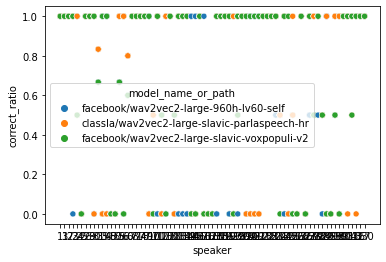

In [58]:
from ast import literal_eval
s = df[df.split == "test"].correct_ratio_breakdown.apply(literal_eval).apply(pd.Series)
# s["model_name_or_path"] = df[df.split=="test"].model_name_or_path.tolist()

models = df[df.split=="test"].model_name_or_path.tolist()
new_models = [models[i] for j in range(73) for i in range(12)]

        
ndf = s.melt().rename(columns={
    "variable": "speaker",
    "value": "correct_ratio"
})
ndf["model_name_or_path"] = new_models
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=ndf, x="speaker", y="correct_ratio", hue="model_name_or_path" )

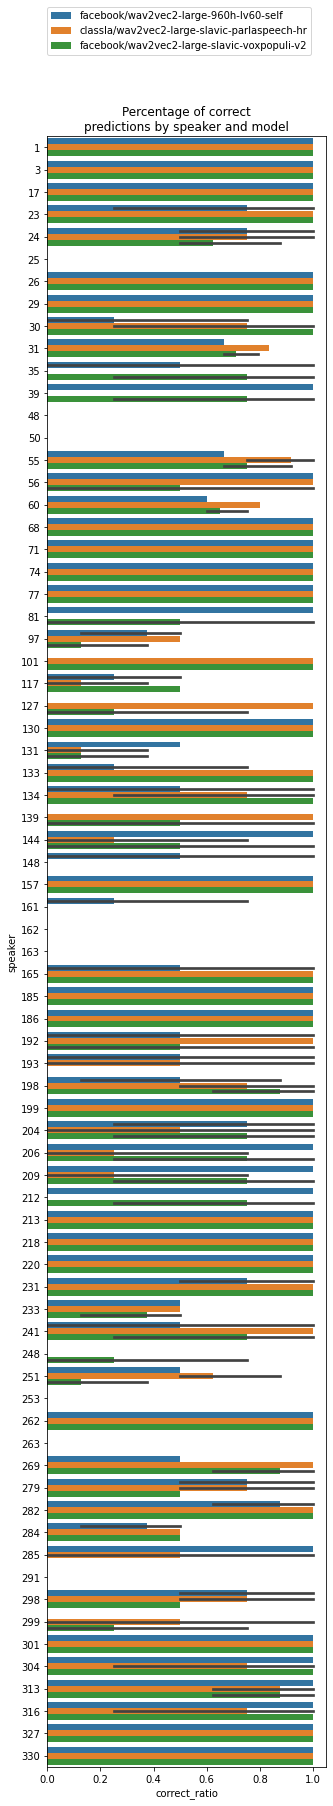

In [68]:
gb = ndf.groupby("speaker").aggregate({
    "correct_ratio": ["mean", "std"]
})

plt.figure(figsize=(5, 30))
sns.barplot(data = ndf, y = "speaker" , x = "correct_ratio", hue="model_name_or_path")
plt.title("Percentage of correct\npredictions by speaker and model")
plt.legend(loc=(0, 1.05))
# plt.tight_layout()
plt.savefig("images/005_speaker_and_model_correctness.jpg", dpi=200)
plt.show()

In [59]:
gb

correct_ratio          
                 mean       std
speaker                        
1            1.000000  0.000000
101          0.666667  0.492366
117          0.291667  0.257464
127          0.416667  0.514929
130          1.000000  0.000000
...               ...       ...
71           1.000000  0.000000
74           1.000000  0.000000
77           1.000000  0.000000
81           0.500000  0.522233
97           0.333333  0.246183

[73 rows x 2 columns]